# TERPBUY ASSIGNMENT

In [1]:
# Installing SQL connector
!pip install mysql-connector-python

In [2]:
#importing mysql connector, pandas, and numpy

import mysql.connector
import pandas as pd
import numpy as np

In [3]:
#connecting the database from MySQL
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='root', password='******')

### Task 1: Write a query to show the quantity of items sold by each department. Sort the results by department name.

In [80]:
#writing SQL query to show quantity sold by each department and sorting them by department
department_sales = pd.read_sql("""SELECT d.department_name as Department, sum(ol.quantity_sold) AS Quantity_Sold
                            FROM order_line ol
                            INNER JOIN product p ON p.product_id = ol.product_id
                            INNER JOIN department d ON d.department_id = p.department_id
                            GROUP BY d.department_name
                            ORDER BY d.department_name""", conn)
department_sales

,Department,Quantity_Sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


### Task 2: Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

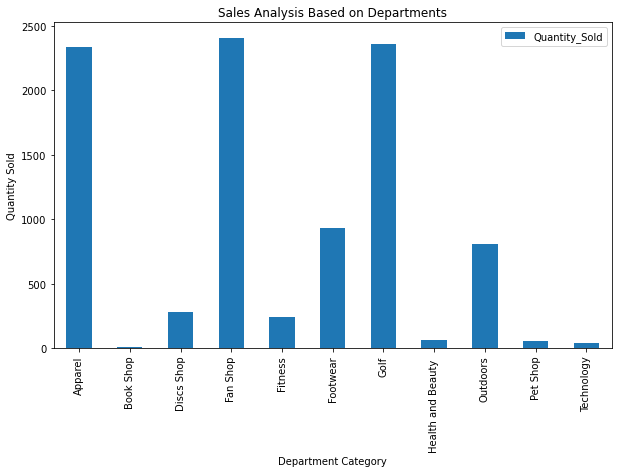

None


In [124]:
#importing matplotlib.pyplot to create a data visualization graphs
import matplotlib.pyplot as plt

#creating data visualization that shows all departments and the number of items sold by them
department_sales.plot(kind = 'bar', x="Department", y = 'Quantity_Sold', figsize = (10, 6))
plt.title('Sales Analysis Based on Departments')
plt.xlabel('Department Category')
plt.ylabel('Quantity Sold')
print(plt.show())

#### Based on data visualization of department's sales, Terpbuy is selling more items in 'Apparrel, Fan Shop, and Golf' categories. The sales in 'Book Shop, Technology, Pet Shop and Health & Beauty' categories are very low.   

---------------------------------
### Task 3: Write a query to show the number of orders placed in each year in which at least one order was placed.

In [137]:
#writing a query to show total number of orders placed in each year

year_df = pd.read_sql('SELECT YEAR(order_date) as Year, count(order_id) as total_orders \
                      FROM orders GROUP BY YEAR \
                      HAVING count(order_id) > 0;', conn)
print(f'The number of orders placed in each year are as follow:')
print(year_df)

The number of orders placed in each year are as follow:
   Year  total_orders
0  2018           585
1  2019           708
2  2020           497
3  2021           362


### Task 4: Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.

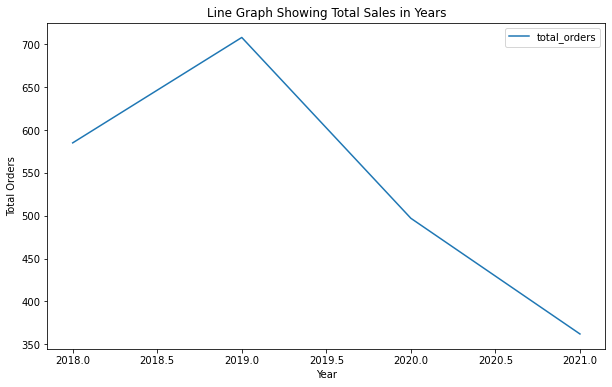

In [141]:
#creating a line graph to visualize the sales in each year

year_df.plot(kind = 'line', x = 'Year', y = 'total_orders', figsize =(10,6))
plt.title('Line Graph Showing Total Sales in Years')
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.show()

#### Based on above observation, we can analyze that the sales are decreasing since past 2 years. The sales were highest in 2019. 